<a href="https://colab.research.google.com/github/santamus/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = 'drive/MyDrive/Colab Notebooks/adult.data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
link_method = 'ward'

df = pd.read_table(filename, sep=",")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data = df.iloc[:, [0, 2, 4, 10, 11, 12]].values

In [ ]:
linked = linkage(data, method=link_method)


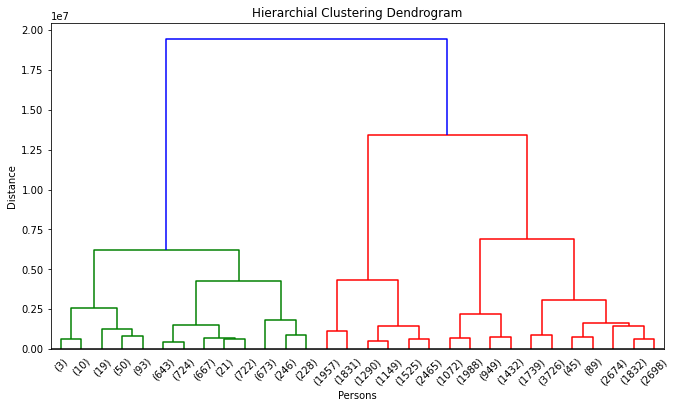

In [ ]:
plt.figure(figsize=(11, 6))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Persons')
plt.ylabel('Distance')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp')
plt.axhline(y=45, c='k')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=link_method)


def wss_calculation(K, data):
    WSS = []
    for i in range(K):
        cluster = AgglomerativeClustering(n_clusters=i + 1, affinity='euclidean', linkage=link_method)
        cluster.fit_predict(data)
        # cluster index
        label = cluster.labels_
        wss = []
        for j in range(i + 1):
            # extract each cluster according to its index
            idx = [t for t, e in enumerate(label) if e == j]
            cluster = data[idx, ]
            # calculate the WSS:
            cluster_mean = cluster.mean(axis=0)
            distance = np.sum(np.abs(cluster - cluster_mean) ** 2, axis=-1)
            wss.append(sum(distance))
        WSS.append(sum(wss))
    return WSS

In [ ]:
WSS = wss_calculation(15, data)

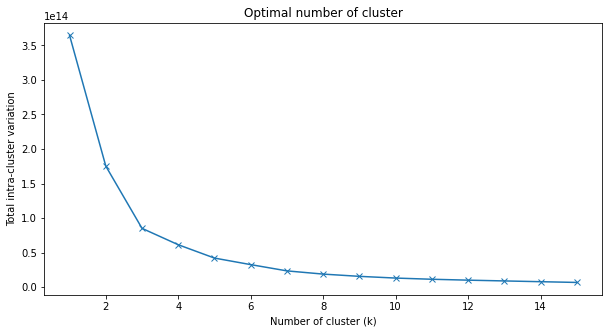

In [ ]:
cluster_range = range(1, 16)

plt.figure(figsize=(10, 5))
plt.title('Optimal number of cluster')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Total intra-cluster variation')
plt.plot(cluster_range, WSS, marker="x")
plt.show()

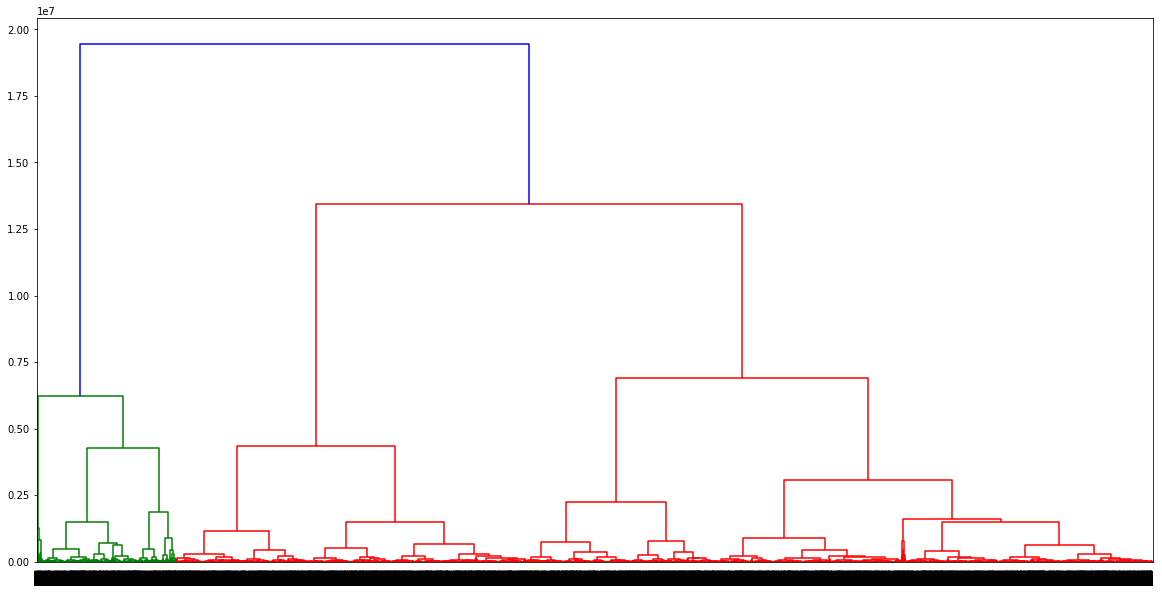

[    1     2     3 ... 13751 13752 13753]


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = dendrogram(linked)

plt.show()

label = fcluster(linked, 45, criterion='distance')
print(np.unique(label))

df.loc[:, 'label'] = label